# Übung Multiclass Classification

### Multiclass Classification an einem generischen Datenset

Als Einführung in die Klassifikation mit $K$ Klassen generieren wir ein Training Set bestehend aus 300 Training Examples $\vec{x}^{(i)}\in\mathbb{R}^2$ ($i=1,\ldots,300$). 
Wir wählen je 100 Training Examples für jede Klasse, d.h. es gibt drei Klassen und für die zugehörigen Targets gilt $y^{(i)}=0$ für $1\leq i \leq 100$, $y^{(i)}=1$ für $101\leq i \leq 200$ und $y^{(i)}=2$ für $201\leq i \leq 300$.

Im folgenden finden Sie zwei Training Sets: Lassen Sie bei ersten Training Set die Parameter fix und variieren Sie 
beim zweiten Traing optional die die Parameter $K$ (Anzahl der Klassen) und $N$ (Anzahl der Datenpunkte pro Klasse).


In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Lassen Sie die Anzahl der Features fix ...
n = 2 # Anzahl Features

# ... variieren Sie im Falle von Training Set 2 die folgenden Paramter
K = 3 # Anzahl Klassen
N = 100 # Anzahl Datenpunkte pro Klasse

m = N*K # Anzahl Training Examples

Wählen Sie für das Training eines der folgenden beiden Training Sets aus:

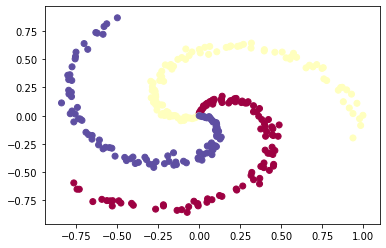

In [2]:
# Training Set 1

X = np.zeros((N*K,n)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + 0.1*np.random.randn(N) # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

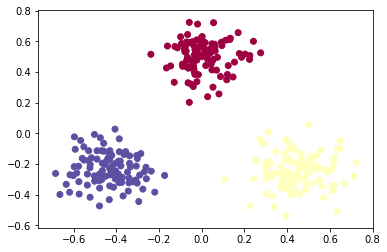

In [11]:
# Training Set 2

X = np.zeros((N*K,n)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    #r = np.linspace(0.0,1,N) # radius
    #t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.1 # theta
     
    X[ix] = np.array([0.5*np.sin(2*np.pi/K*j), 0.5*np.cos(2*np.pi/K*j)]) + 0.1*np.random.randn(N,2)
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()

- Bereiten Sie die Daten für das Gradient Descent Verfahren auf (=füllen Sie die erste Spalte (!) der Datenmatrix X mit 1 auf).

In [12]:
X = np.hstack((np.ones((m,1)),X))

Nutzen Sie die Testdaten von oben um 

- das Gradient Descent Verfahren durchzuführen.
- prozentual die von der Hypothese korrekt berechneten Targets anzugeben.

In [13]:
W = 0.01 * np.random.randn(n+1,K)
W[0,:] = 0.0 
alpha = 0.005
iterations = 1000

#T = np.zeros((m,K))
#T[range(m),y]=1
for i in range(iterations):
    H = np.exp(np.dot(X,W))/ np.sum(np.exp(np.dot( X,W)), axis=1, keepdims=True)
    H[range(m),y] -=1
    #W = W-alpha*np.dot(X.T,H-T)
    W = W-alpha*np.dot(X.T,H)
print(W)


# Berechnung der Hypothese

pred = np.argmax(np.exp(np.dot( X,W))/ np.sum(np.exp(np.dot( X,W)), axis=1, keepdims=True),axis=1)
print(np.mean(y==pred))

[[ 6.03481494e-03  3.70679043e-02 -4.31027192e-02]
 [ 5.69660834e-02  7.97146048e+00 -8.01369400e+00]
 [ 9.05974330e+00 -4.55597886e+00 -4.47537485e+00]]
1.0


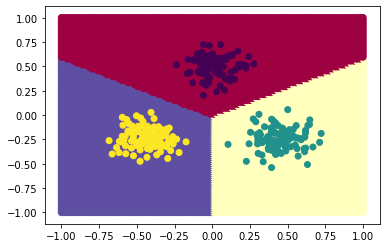

In [14]:
#### Plot the boundaries

S=100
X_p,Y_p = np.meshgrid(np.linspace(-1.0,1.0,S),np.linspace(-1.0,1.0,S))
X_p = X_p.reshape(S**2,1)
Y_p = Y_p.reshape(S**2,1)
X_p = np.hstack([X_p,Y_p])
X_p = np.hstack((np.ones((S**2,1)),X_p))

scores =  np.dot(X_p, W) 
predicted_class = np.argmax(scores, axis=1)
plt.scatter(X_p[:, 1], X_p[:, 2], c=predicted_class, s=40, cmap=plt.cm.Spectral)
plt.scatter(X[:, 1], X[:, 2], c=y)
plt.show()

- Wiederholen Sie die wesentlichen Punkte von oben mittels sklearn (die Plots brauchen Sie nicht erneut generieren).
- Bestimmen Sie zudem die Confusion Matrix inklusive precision und recall

In [7]:
from sklearn import linear_model
from sklearn import metrics

clas = linear_model.LogisticRegression()

################
# Your code here
################
clas.fit(X[:,1:n+1],y)

print(clas.score(X[:,1:n+1],y))

pred = clas.predict(X[:,1:n+1])
cm = metrics.confusion_matrix(y, pred)
print(cm)

print(metrics.precision_score(y,pred,average=None))
print(metrics.recall_score(y,pred,average=None))

0.5166666666666667
[[51 38 11]
 [ 3 58 39]
 [42 12 46]]
[0.53125    0.53703704 0.47916667]
[0.51 0.58 0.46]


### Multiclass Classification am Beispiel von MINST

Wir nutzen wieder die MNIST-Datenbank und lesen diesmal alle Ziffern von 0 bis 9 (d.h. K = 10 Klassen) ein.
Das gesamte MNIST Datenset hat $m=70000$ Training Examples: 
- Erste 60000 Daten: Training Set 
- letzte 10000 Daten: Test Set

Splitten Sie nach dem Einlesen von MNIST die Daten also entsprechend auf. Nutzen Sie im folgenden wieder sklearn, um:

- die Softmax Regression durchzuführen
- Die Accuracy des Test Sets zu berechnen
- die Confusion Matrix zu berechnen
- Precision und Recall zu berechnen
- Einen Plot zu generieren, welcher die Zahlen, die im Matrixelement (t,p) der Confusion-Matrix stehen, plottet.

In [18]:
from sklearn.datasets import fetch_mldata
from sklearn import linear_model

mnist = fetch_mldata('MNIST original',data_home='mnist_data')
X,y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
cf = linear_model.LogisticRegression(multi_class='multinomial',solver='lbfgs')

cf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
print(cf.score(X_train,y_train))
print(cf.score(X_test,y_test))

0.9339166666666666
0.9255


In [19]:
from sklearn import metrics
pred = cf.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

print(metrics.precision_score(y_test,pred,average=None))
print(metrics.recall_score(y_test,pred,average=None))

[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]
[0.95441031 0.96779809 0.92971888 0.90335306 0.93429158 0.90337602
 0.94300518 0.93143976 0.86726547 0.91196835]
[0.98265306 0.97973568 0.89728682 0.90693069 0.92668024 0.86995516
 0.94989562 0.92509728 0.89219713 0.91377602]


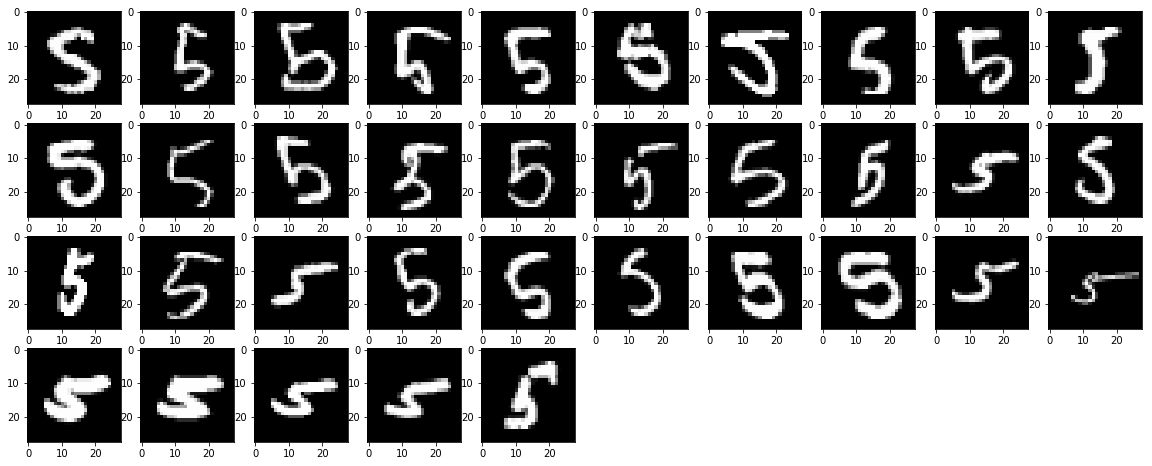

In [20]:
# True and predicted
import numpy as np
import matplotlib.pyplot as plt
t = 5
p = 8
v = (y_test==t)*(pred==p)

# Determine misclassified images
X_mc = X_test[v,:]
a,b = X_mc.shape

plt.figure(figsize=(20,10))
for k in range(a):
    plt.subplot(5, 10 , k + 1) 
    plt.imshow(np.reshape(X_mc[k,:], (28,28)), cmap=plt.cm.gray)